# Applied math concepts for machine learning - Group 6 project

Students name in this Group:
- Gabriel Okazaki
- Julio Socher
- Kateryna Solonenko
- Mohit Sabharwal
- Riya Gupta
- Vaibhav Saini

In [100]:
import pandas as pd

In [101]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [103]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

## Data preprocessing

### Processing 'Sex' categorical column

In [104]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [105]:
df_dummies = pd.get_dummies(df['Sex'], dtype=int)
df_processed = pd.concat([df, df_dummies], axis=1)
del df_processed['Sex']
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1


### Processing 'ChestPainType' categorical column

In [106]:
df_processed['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
encoder = LabelEncoder()
df_processed['ChestPainType']= encoder.fit_transform(df_processed['ChestPainType'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,2,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,2,150,195,0,Normal,122,N,0.0,Up,0,0,1


In [109]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}

### Processing 'RestingECG' categorical column

In [110]:
df_processed['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [111]:
encoder = LabelEncoder()
df_processed['RestingECG']= encoder.fit_transform(df_processed['RestingECG'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,N,0.0,Up,0,0,1
1,49,2,160,180,0,1,156,N,1.0,Flat,1,1,0
2,37,1,130,283,0,2,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,1,108,Y,1.5,Flat,1,1,0
4,54,2,150,195,0,1,122,N,0.0,Up,0,0,1


In [112]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'LVH': 0, 'Normal': 1, 'ST': 2}

### Processing 'ExerciseAngina' categorical column

In [113]:
df_processed['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [114]:
df_processed['ExerciseAngina'] = df_processed['ExerciseAngina'].replace({'Y':1, 'N':0})
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,Up,0,0,1
1,49,2,160,180,0,1,156,0,1.0,Flat,1,1,0
2,37,1,130,283,0,2,98,0,0.0,Up,0,0,1
3,48,0,138,214,0,1,108,1,1.5,Flat,1,1,0
4,54,2,150,195,0,1,122,0,0.0,Up,0,0,1


### Processing 'ST_Slope' categorical column

In [115]:
df_processed['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [116]:
encoder = LabelEncoder()
df_processed['ST_Slope']= encoder.fit_transform(df_processed['ST_Slope'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,2,0,0,1
1,49,2,160,180,0,1,156,0,1.0,1,1,1,0
2,37,1,130,283,0,2,98,0,0.0,2,0,0,1
3,48,0,138,214,0,1,108,1,1.5,1,1,1,0
4,54,2,150,195,0,1,122,0,0.0,2,0,0,1


In [117]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'Down': 0, 'Flat': 1, 'Up': 2}

In [118]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   ChestPainType   918 non-null    int64  
 2   RestingBP       918 non-null    int64  
 3   Cholesterol     918 non-null    int64  
 4   FastingBS       918 non-null    int64  
 5   RestingECG      918 non-null    int64  
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    int64  
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    int64  
 10  HeartDisease    918 non-null    int64  
 11  F               918 non-null    int64  
 12  M               918 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 93.4 KB


### Dealing with null values

In [119]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: >

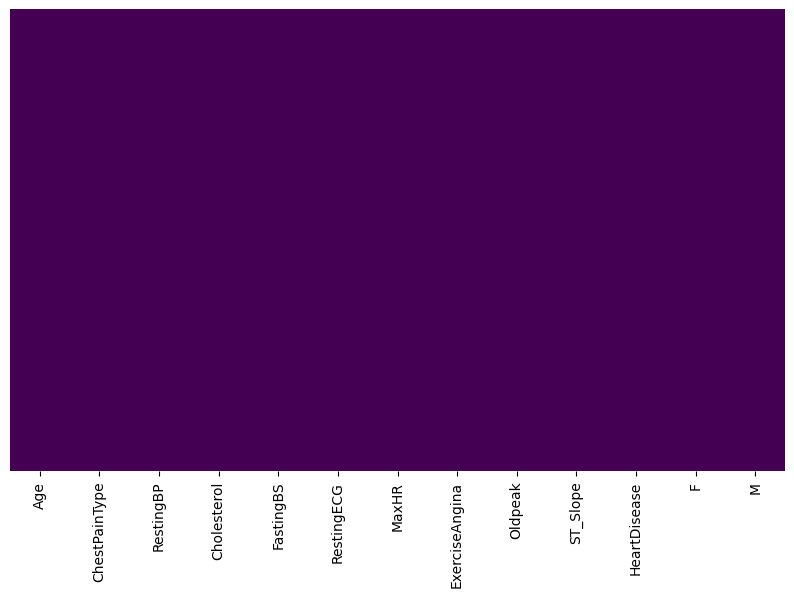

In [120]:
# Only `bmi` has Null values
plt.figure(figsize=(10,6))
sns.heatmap(df_processed.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Splitting dataset

In [121]:
X = df_processed.drop('HeartDisease', axis=1)
X.shape

(918, 12)

In [122]:
y = df_processed['HeartDisease']
y.shape

(918,)

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)